<a href="https://colab.research.google.com/github/sultanardian/Deep-Learning-and-Data-Science/blob/main/COVID-19%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, Flatten

In [ ]:
CATS = ['CT_COVID', 'CT_NonCOVID']
DIR = '/content/drive/MyDrive/Dataset/Covid19-1'

asset = []
img_size = 100

for category in CATS:
    folder = os.path.join(DIR, category)
    idx = CATS.index(category)
    
    for img in os.listdir(folder):
        path = os.path.join(folder, img)
        img_raw = cv2.imread(path)
        img_resize = cv2.resize(img_raw, (img_size, img_size))
        asset.append([img_resize, idx])

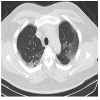

In [ ]:
cv2_imshow(asset[0][0])

In [ ]:
asset[0][0]

array([[[248, 248, 248],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [254, 254, 254]],

       [[254, 254, 254],
        [ 77,  77,  77],
        [ 43,  43,  43],
        ...,
        [ 45,  45,  45],
        [253, 253, 253],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 79,  79,  79],
        [ 56,  56,  56],
        ...,
        [ 53,  53,  53],
        [253, 253, 253],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
asset[0][1]

0

In [ ]:
X, y = [], []

for img, label in asset:
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_new = X_train/255.0
X_test_new = X_test/255.0

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [ ]:
X_train_new[0][0]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.25098039, 0.25098039, 0.25098039],
       [0.23137255, 0.23137255, 0.23137255],
       [0.21568627, 0.21568627, 0.21568627],
       [0.22745098, 0.22745098, 0.22745098],
       [0.24313725, 0.24313725, 0.24313725],
       [0.2       , 0.2       , 0.2       ],
       [0.21176471, 0.21176471, 0.21176471],
       [0.21960784, 0.21960784, 0.21960784],
       [0.21176471, 0.21176471, 0.21176471],
       [0.21568627, 0.21568627, 0.21568627],
       [0.

In [ ]:
y_train_new[0]

array([1., 0.], dtype=float32)

In [ ]:
y_test_new[100]

array([0., 1.], dtype=float32)

In [ ]:
X_train.shape

(596, 100, 100, 3)

In [ ]:
train_generator = ImageDataGenerator(
    validation_split = 0.2,
    zoom_range = 10,
    rotation_range = 15,
    rescale = 1/255,
    horizontal_flip = True
)

test_generator = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train = train_generator.flow(X_train, y_train_new, subset = 'training')
validation = train_generator.flow(X_train, y_train_new, subset = 'validation')
test = test_generator.flow(X_test, y_test_new)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 5, input_shape = (img_size, img_size, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 64, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 128)         204928    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 128)       

In [ ]:
history = model.fit(x = train, validation_data = validation, epochs = 10)

Epoch 1/10
15/15 [==============================] - 9s 592ms/step - loss: 0.6657 - accuracy: 0.6080 - val_loss: 0.6713 - val_accuracy: 0.5882
Epoch 2/10
15/15 [==============================] - 9s 573ms/step - loss: 0.6662 - accuracy: 0.5954 - val_loss: 0.6772 - val_accuracy: 0.6050
Epoch 3/10
15/15 [==============================] - 9s 570ms/step - loss: 0.6695 - accuracy: 0.5618 - val_loss: 0.6772 - val_accuracy: 0.5042
Epoch 4/10
15/15 [==============================] - 9s 578ms/step - loss: 0.6875 - accuracy: 0.5451 - val_loss: 0.6901 - val_accuracy: 0.5042
Epoch 5/10
15/15 [==============================] - 9s 570ms/step - loss: 0.6725 - accuracy: 0.5765 - val_loss: 0.6908 - val_accuracy: 0.4958
Epoch 6/10
15/15 [==============================] - 9s 569ms/step - loss: 0.6636 - accuracy: 0.6080 - val_loss: 0.6819 - val_accuracy: 0.6134
Epoch 7/10
15/15 [==============================] - 9s 569ms/step - loss: 0.6676 - accuracy: 0.5996 - val_loss: 0.6814 - val_accuracy: 0.5714
Epoch 

In [ ]:
model.evaluate(test)

5/5 [==============================] - 1s 114ms/step - loss: 0.7008 - accuracy: 0.5133


[0.7007600665092468, 0.5133333206176758]